In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
import json
import numpy as np

In [3]:
dataset = pd.read_csv("../data/data.csv")

with open("../data/result.json", "r") as f:
    raw = json.load(f)

c = np.array(raw["c"])
m = np.array(raw["m"])
msc = np.array(raw["msc"])

size = len(m)

result = pd.DataFrame({"c":c, "m":m, "msc":msc})
print("size is", size)
result

size is 318


,c,m,msc
0,4953.847252,0.001619,0.205790
1,5552.876935,0.001975,0.077457
2,5846.674730,0.001795,0.052027
3,6007.802381,0.001391,0.045855
4,6110.793028,0.000899,0.043345
...,...,...,...
313,8498.601469,-0.021439,0.010350
314,8498.626245,-0.021440,0.010350
315,8498.650406,-0.021440,0.010350
316,8498.673968,-0.021440,0.010350


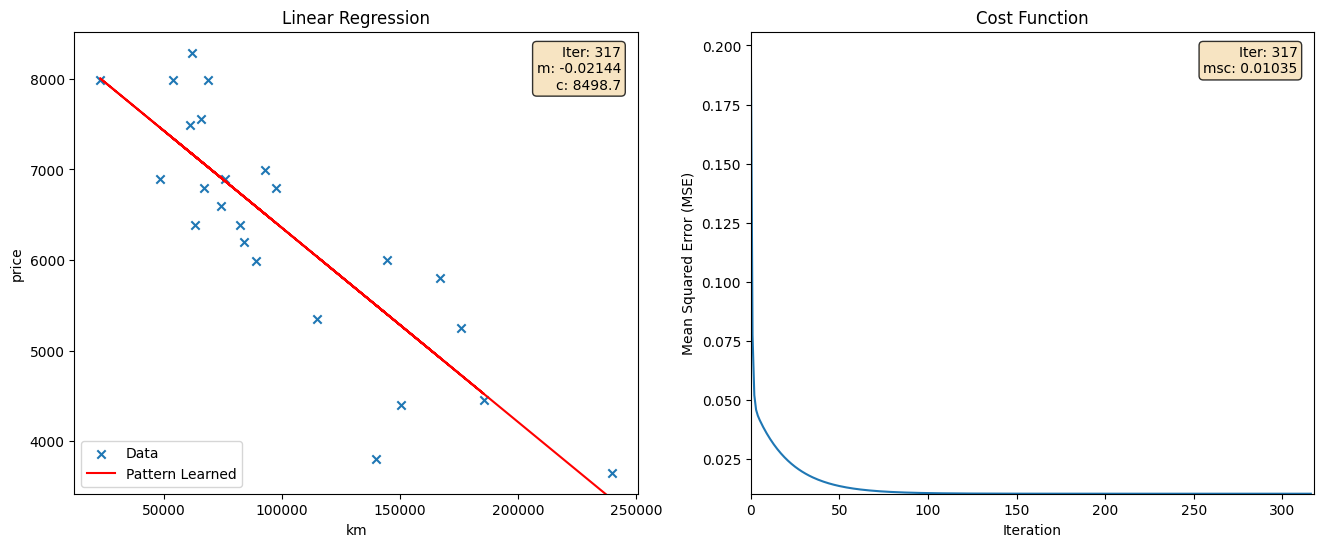

In [4]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))

ax[0].scatter(dataset["km"], dataset["price"], marker='x', label='Data')

left_ani_plot, = ax[0].plot([], [], color="r", label='Pattern Learned')
right_ani_plot, = ax[1].plot([], []) 

ax[1].set_xlim(0, size)
ax[1].set_ylim(np.min(result["msc"]), np.max(result["msc"]))

left_info = ax[0].text(0.97, 0.97, '', transform=ax[0].transAxes, 
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

right_info = ax[1].text(0.97, 0.97, '', transform=ax[1].transAxes, 
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax[0].set_xlabel('km')
ax[0].set_ylabel('price')
ax[0].set_title('Linear Regression')

ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Mean Squared Error (MSE)')
ax[1].set_title('Cost Function')

def render(frame):
    left_ani_plot.set_data(
            dataset["km"], 
            result["c"][frame] + result["m"][frame] * dataset["km"]
        )
    
    left_info.set_text(f"Iter: {frame}\n" \
                    f"m: {result["m"][frame]:.5f}\n" \
                    f"c: {result["c"][frame]:.6}"
                    )
    
    right_ani_plot.set_data(
        np.arange(frame),
        result["msc"][: frame]
    )

    right_info.set_text(f"Iter: {frame}\n" \
                f"msc: {result["msc"][frame]:.5f}")
    
    return left_ani_plot,  left_info, right_ani_plot, right_info

ani = FuncAnimation(
    fig, 
    func=render,
    frames=size,
    interval=50,
    blit=True
)

ax[0].legend()
ani.save("bonus.gif", writer='pillow', fps=20)
plt.show()